In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dcase2013_results.csv')

In [3]:
embedding_subset = []
embedding_model = []
embedding_feature = []

for p in df['Model ID'].values: 
    
    # training set
    subset = p.split('/')[3]
    subset = subset[:3]
    embedding_subset.append(subset)
    
    # model name
    model = p.split('/')[4]
    if model=='cnn_L3_orig':
        model = '1_orig'
    elif model=='cnn_L3_kapredbinputbn':
        model = '2_norm'
    elif model=='cnn_L3_melspec1':
        model = '3_mel1'
    elif model=='cnn_L3_melspec2':
        model = '4_mel2'
    
    embedding_model.append(model)
    embedding_feature.append(p.split('/')[2])

In [4]:
df['embedding_subset'] = embedding_subset
df['embedding_model'] = embedding_model
df['embedding_feature'] = embedding_feature

In [5]:
df_sorted = df.sort_values(by=['embedding_subset', 'embedding_model', 'embedding_feature'])

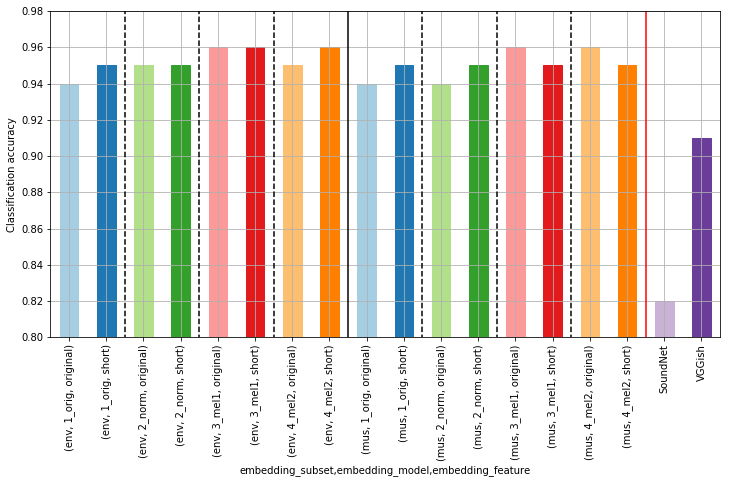

In [6]:
ax = df_sorted.plot.bar(y='Test\nAccuracy', figsize=(12, 6), 
                        x=['embedding_subset', 'embedding_model', 'embedding_feature'])
plt.ylim([.8, 0.98])
plt.grid()
plt.vlines(7.5, 0, 1) # mus/env separator
plt.vlines(15.5, 0, 1, 'r') # vggish soundnet separator
plt.vlines([1.5, 3.5, 5.5, 9.5, 11.5, 13.5], 0, 1, linestyles='dashed')
labels = ax.get_xmajorticklabels()
labels_txt = [t.get_text() for t in labels]
labels_txt[-2] = 'SoundNet'
labels_txt[-1] = 'VGGish'
ax.set_xticklabels(labels_txt)

# Set colors
pal = sns.color_palette("Paired", n_colors=10)
colors = pal[:8] * 2
colors.extend(pal[-2:])
for idx in range(18):
    ax.get_children()[idx+3].set_color(colors[idx])
    
# remove legend()
ax.legend().set_visible(False)

# axis labels
plt.ylabel('Classification accuracy')
plt.show()